Business Understanding

The telecommunications industry is fiercely competitive, with customers having numerous service providers to choose from.  High customer churn, the rate at which subscribers discontinue service, is a significant challenge. The average annual churn rate in this industry ranges from 15% to 25%, making customer retention a top priority.  Acquiring new customers is roughly 5 to 10 times more expensive than retaining existing ones, highlighting the importance of keeping current subscribers satisfied.

To effectively reduce churn, telecom companies need to proactively identify customers at high risk of leaving. Common causes of churn include poor customer service, inadequate products, and unfavorable pricing plans. Losing customers can have serious consequences, including increased costs for customer acquisition and product development, a decline in referrals, and a reduced Customer Lifetime Value (CLV).

In today's challenging economic climate, with rising interest rates, inflation, and an uncertain job market, addressing customer churn is even more critical for telecommunications companies.

Problem statement

The Sales and Marketing department at Syria Tel is struggling to retain customers due to high churn rates. This directly impacts revenue and hinders company growth.  Inefficient resource allocation limits their ability to optimize marketing campaigns.  This misallocation wastes budget and reduces the overall effectiveness of marketing efforts.  Furthermore, targeting the wrong customer segments exacerbates churn and undermines profitability.  A customer churn prediction system can address these challenges.

Relation to Syriatel

Implementing a customer churn prediction system offers significant benefits to the Syriatel Sales and Marketing team:

Reduced Churn: Proactive identification and retention of at-risk customers will lead to higher customer lifetime value and increased revenue streams.
Optimized Campaigns: Using customer insights to tailor campaigns will maximize return on investment (ROI) and improve campaign effectiveness.
Precision Marketing: Identifying and engaging high-value prospects will result in higher conversion rates and optimized resource allocation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV                
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [10]:
#loading data
data_path = r"C:\Users\user\Downloads\archive (4)\bigml_59c28831336c6604c800002a.csv"
data = pd.read_csv(data_path)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Data Understanding

SyriaTel Dataset (3,333 rows, 21 columns) Breakdown:

Customer Demographics (Understanding Behavior):

State (categorical) - Residence location.
Account Length (numerical) - Months with company.
Area Code (categorical) - Customer location.
Phone Number (unique identifier) - Likely anonymized.
Plan and Service Usage (Charges and Churn):

International Plan (binary) - International calling plan.
Voicemail Plan (binary) - Voicemail plan subscription.
Number of Voicemail Messages (numerical) - Total received messages.
Call Activity (Usage Patterns and Churn):

Day Minutes/Calls/Charges (numerical) - Daytime usage patterns.
Evening Minutes/Calls/Charges (numerical) - Evening usage patterns.
Night Minutes/Calls/Charges (numerical) - Nighttime usage patterns.
International Minutes/Calls/Charges (numerical) - International usage.
Customer Service Interaction (Crucial Metric):

Customer Service Calls (numerical) - Calls to customer service (dissatisfaction/self-service needs).
Target Variable (Prediction):

Next Steps (Data Exploration):

Unique Values: Identify unique values in categorical features.
Statistics: Calculate summary statistics for numerical features.
Target Distribution: Analyze churn rate (proportion of churned customers).
Irrelevant Columns: Evaluate feature relevance for prediction (remove irrelevant ones).

In [11]:
# View the Unique Values
print(data.nunique())

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [12]:
# Get concise summary of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [14]:
# Explore numerical data statistics
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
# Analyze churn distribution
churn_counts = data['churn'].value_counts()
churn_counts

False    2850
True      483
Name: churn, dtype: int64

Data Cleaning

In [20]:
#check for missing values
missing_values_by_column = data.isnull().sum()
missing_values_by_column

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [50]:
#Encoding
categorical_features = ['international plan', 'voice mail plan']
encoder = LabelEncoder()

for col in categorical_features:
  data[col] = encoder.fit_transform(data[col])

# Convert 'churn' to boolean
data['churn'] = data['churn'].astype(bool)

data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,call_day_night_ratio,total_charge_per_day_min,customer_service_calls_per_year,total_monthly_charges
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,10.0,3,2.70,1,False,300,1.195652,0.169372,0.007812,72.86
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,13.7,3,3.70,1,False,329,1.182692,0.168942,0.009346,55.54
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,12.2,5,3.29,0,False,328,1.085714,0.169313,0.000000,59.00
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,6.6,7,1.78,2,False,248,0.788889,0.169441,0.023810,65.02
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,10.1,3,2.73,3,False,356,0.926230,0.168992,0.040000,49.36


Due to an issue we had at a later code block, we will need to do remove hyphens from the phone numbers as well

In [56]:
import re
data['phone number'] = data['phone number'].apply(lambda x: re.sub(r'-', '', x))


Exploratory Data Analysis(EDA)

In [44]:
#Let's find the average total calls after creating a new column for total calls
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']
average_total_calls = data['total calls'].mean()
print("Average Total Calls:", average_total_calls)


Average Total Calls: 300.65766576657666


Feature Engineering

In [45]:
#Call Behavior
data['call_day_night_ratio'] = data['total day calls'] / (data['total night calls'] + 1)
data['total_charge_per_day_min'] = data['total day charge'] / (data['total day minutes'] + 1)

In [46]:
#Customer Service
data['customer_service_calls_per_year'] = data['customer service calls'] / data['account length']

In [47]:
#Service Plans and Pricing
data['total_monthly_charges'] = data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)

Feature importance

In [59]:
def analyze_feature_importance(data):
  """
  This function analyzes feature importance using a Random Forest Classifier.

  Args:
      data (pd.DataFrame): The customer churn data.

  Returns:
      pd.DataFrame: A DataFrame containing feature names and their importance scores.
  """

  # Preprocess data (remove hyphens from phone number)
  data['phone number'] = data['phone number'].apply(lambda x: re.sub(r'-', '', x))

  # Create a copy of the preprocessed data
  data_copy = data.copy(deep=True)

  # Encode categorical variables (label encoding for churn, one-hot for others)
  categorical_cols = ["international plan", "voice mail plan", "state"]

  # Label encode churn (convert categories to numerical labels)
  label_encoder = LabelEncoder()
  data_copy['churn'] = label_encoder.fit_transform(data_copy['churn'])

  # One-hot encode other categorical variables (create new binary columns)
  onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  encoded_data = onehot_encoder.fit_transform(data_copy[categorical_cols[1:]])
  encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names(categorical_cols[1:]))
  data_copy = pd.concat([data_copy, encoded_df], axis=1)
  data_copy.drop(categorical_cols, axis=1, inplace=True)  # Remove original categorical columns

  # Split data into features (X) and target variable (y)
  X = data_copy.drop('churn', axis=1)
  y = data_copy['churn']

  # Train-test split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a Random Forest Classifier with hyperparameters (consider tuning)
  random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
  random_forest_classifier.fit(X_train, y_train)

  # Extract feature importances
  feature_importances = random_forest_classifier.feature_importances_

  # Combine feature names and importances into a DataFrame
  feature_names = X.columns
  feature_importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})  # Use defined variable name

  # Sort by importance (descending)
  feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

  return feature_importance_data

# Example usage (assuming you have your data in a DataFrame named 'data')
feature_importance_df = analyze_feature_importance(data.copy())
print(feature_importance_df)

                     Feature  Importance
21     total_monthly_charges    0.162288
16    customer service calls    0.091387
4          total day minutes    0.071645
6           total day charge    0.066182
19  total_charge_per_day_min    0.057015
..                       ...         ...
24                  state_AK    0.000654
32                  state_DE    0.000638
36                  state_IA    0.000636
70                  state_VT    0.000499
35                  state_HI    0.000207

[75 rows x 2 columns]


Data Visualization

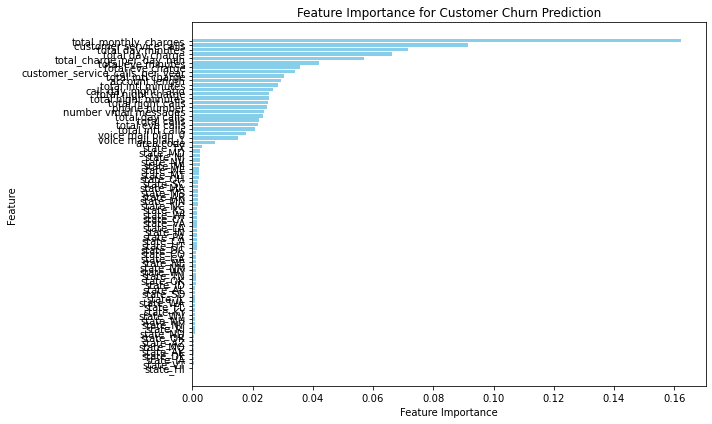

In [61]:
features = feature_importance_df['Feature'].to_numpy()
importances = feature_importance_df['Importance'].to_numpy()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(features, importances, color='skyblue')  # Horizontal bar chart
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Customer Churn Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top

# Display the chart
plt.tight_layout()
plt.show()